In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
import matplotlib.pyplot as plt

LISTINGSFILE = 'listings.csv'

cols = ['bedrooms', 'beds', 'price', 'square_feet']

df = pd.read_csv(LISTINGSFILE, usecols=cols)

len(df.index)

59945

In [62]:
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

df.head(5)

,bedrooms,beds,square_feet,price
0,1.0,1.0,NaN,59.0
1,0.0,1.0,NaN,93.0
2,2.0,2.0,NaN,110.0
3,1.0,1.0,NaN,90.0
4,4.0,7.0,NaN,371.0


In [65]:
df.isnull().sum()

bedrooms          91
beds              56
square_feet    58287
price              0
dtype: int64

In [53]:
df = df[df['price'] <= 1000]
df.loc[df['square_feet'].idxmax()]

bedrooms          1.0
beds              1.0
square_feet    1000.0
price            92.0
Name: 425, dtype: float64

float64    4
dtype: int64

In [68]:
df = df.dropna()

In [69]:
len(df.index)

1647

In [70]:
df.describe()

,bedrooms,beds,square_feet,price
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,1.357013,1.892532,391.500304,119.587128
std,0.819743,1.202463,445.051581,211.583668
min,0.000000,1.000000,0.000000,14.000000
25%,1.000000,1.000000,0.000000,65.000000
50%,1.000000,1.000000,323.000000,90.000000
75%,2.000000,2.000000,581.000000,130.000000
max,6.000000,10.000000,6458.000000,8000.000000


In [71]:
df.head()

,bedrooms,beds,square_feet,price
6,2.0,3.0,538.0,135.0
7,1.0,2.0,0.0,105.0
13,1.0,1.0,603.0,100.0
15,1.0,1.0,646.0,75.0
17,0.0,2.0,248.0,79.0


In [72]:
df['square_feet'].value_counts()

0.0       498
323.0      66
377.0      60
431.0      59
538.0      49
646.0      43
484.0      38
269.0      36
753.0      34
215.0      28
1076.0     27
592.0      27
344.0      24
969.0      24
861.0      20
452.0      19
161.0      19
807.0      17
129.0      16
194.0      16
291.0      15
280.0      15
355.0      14
915.0      14
1184.0     13
700.0      13
1292.0     13
226.0      13
463.0      13
237.0      12
         ... 
1075.0      1
755.0       1
1367.0      1
350.0       1
1884.0      1
1012.0      1
550.0       1
1000.0      1
750.0       1
250.0       1
500.0       1
390.0       1
1840.0      1
450.0       1
1141.0      1
2045.0      1
710.0       1
670.0       1
872.0       1
6458.0      1
1259.0      1
549.0       1
2476.0      1
1561.0      1
11.0        1
1500.0      1
624.0       1
36.0        1
3000.0      1
1270.0      1
Name: square_feet, Length: 152, dtype: int64

In [80]:
df = df[df['square_feet'] <= 1000]
df = df[df['price'] <= 1000]
len(df.index)

1523

In [81]:
from sklearn import preprocessing
imputer = preprocessing.Imputer(missing_values=0, strategy='mean', axis=0)
imputer = imputer.fit(df)
df_imputed = pd.DataFrame(imputer.transform(df.values))
df_imputed.columns = df.columns
df_imputed.index = df.index

In [82]:
df_imputed.describe()

,bedrooms,beds,square_feet,price
count,1523.000000,1523.000000,1523.000000,1523.000000
mean,1.321855,1.741957,455.123782,103.005909
std,0.589321,1.044222,185.031427,61.553140
min,1.000000,1.000000,11.000000,14.000000
25%,1.000000,1.000000,355.000000,65.000000
50%,1.000000,1.000000,455.123782,90.000000
75%,1.321855,2.000000,495.000000,120.000000
max,5.000000,10.000000,1000.000000,600.000000


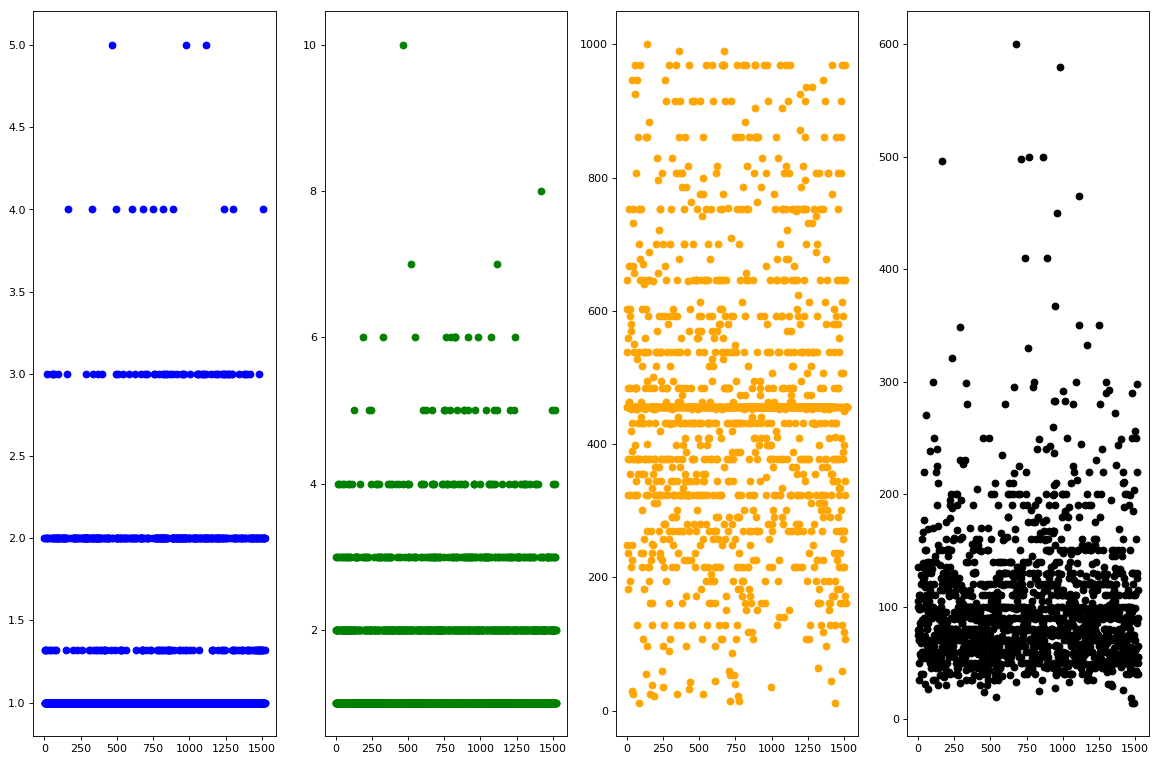

In [91]:
N = len(df_imputed['beds'])
x = range(N)
fig=plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 4, 1)

plt.scatter(x, df_imputed['bedrooms'], c="blue")
plt.subplot(1, 4, 2)
plt.scatter(x, df_imputed['beds'], c="green")
plt.subplot(1, 4, 3)
plt.scatter(x, df_imputed['square_feet'], c="orange")
plt.subplot(1, 4, 4)
plt.scatter(x, df_imputed['price'], c="black")
plt.show()

In [92]:
df_imputed.corr()

,bedrooms,beds,square_feet,price
bedrooms,1.000000,0.713165,0.382717,0.464953
beds,0.713165,1.000000,0.377056,0.427207
square_feet,0.382717,0.377056,1.000000,0.339039
price,0.464953,0.427207,0.339039,1.000000


Text(0,0.5,'Median Absolute Error')

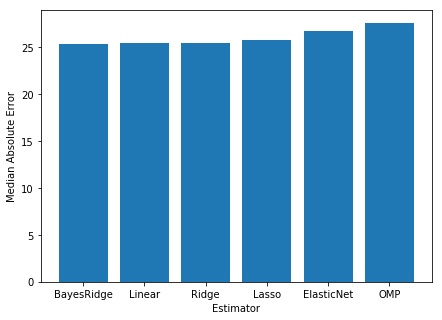

In [93]:
from sklearn import linear_model


rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(df_imputed.drop(['price'], axis=1),
                                                    df_imputed.price, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

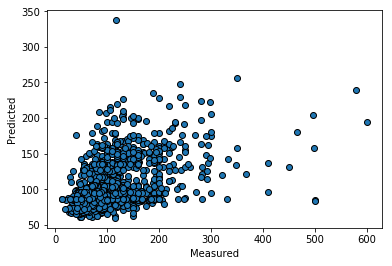

In [94]:
from sklearn.model_selection import cross_val_predict
df_imputed_train = df_imputed.drop(columns='price')
df_imputed_labels = df_imputed.price

lr = linear_model.LinearRegression()
predict = cross_val_predict(lr, df_imputed_train, df_imputed_labels, cv=10)
fig, ax = plt.subplots()
ax.scatter(df_imputed_labels, predict, edgecolors=(0, 0, 0))
# ax.plot([lin_df_labels2.min(), lin_df_labels2.max()], [lin_df_labels2.min(), lin_df_labels2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()